In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

#importing dataset
import io
data_frame = pd.read_csv("covid_data.csv")

In [19]:
data_frame.shape

(585050, 14)

In [20]:
data_frame.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0.0,0.0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0.0,0.0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0.0,0.0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0.0,0.0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0.0,0.0


In [21]:
data_frame.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,5.850500e+05,585050.000000,583300.000000,585049.000000,585049.000000,585049.000000,585049.000000
mean,8.342676e+07,834.466066,33046.018039,36.703996,-88.604989,298.545944,15.696265
std,4.324611e+06,36.575593,18647.675707,9.062513,21.719593,3162.610573,287.215216
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401810e+07,840.000000,19075.000000,33.892368,-97.799362,0.000000,0.000000
50%,8.402920e+07,840.000000,31011.000000,38.000180,-89.484910,3.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.572468,-82.307943,47.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,219616.000000,23336.000000


In [22]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                
data_frame=data_frame.apply(string_to_int.fit_transform)

# **CHECKING FOR NULL VALUES**

In [23]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585050 entries, 0 to 585049
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   UID             585050 non-null  int64
 1   iso2            585050 non-null  int64
 2   iso3            585050 non-null  int64
 3   code3           585050 non-null  int64
 4   FIPS            585050 non-null  int64
 5   Admin2          585050 non-null  int64
 6   Province_State  585050 non-null  int64
 7   Country_Region  585050 non-null  int64
 8   Lat             585050 non-null  int64
 9   Long_           585050 non-null  int64
 10  Combined_Key    585050 non-null  int64
 11  Date            585050 non-null  int64
 12  Confirmed       585050 non-null  int64
 13  Deaths          585050 non-null  int64
dtypes: int64(14)
memory usage: 62.5 MB


In [24]:
data_frame.isnull().sum()

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64

# **SCATTER PLOT BETWEEN Province state AND Confirmed deaths**

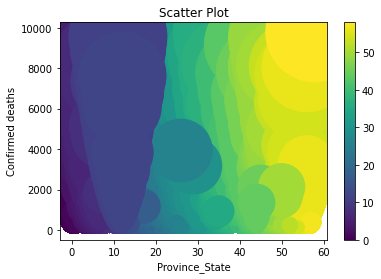

In [25]:
import matplotlib.pyplot as plt
plt.scatter(data_frame['Province_State'], data_frame['Confirmed'], c=data_frame['Province_State'], 

            s=data_frame['Confirmed'])
 
# Adding Title to the Plot

plt.title("Scatter Plot")
 
# Setting the X and Y labels

plt.xlabel('Province_State')

plt.ylabel('Confirmed deaths')
 
plt.colorbar()
 
plt.show()

# **HISTOGRAM FOR Deaths**





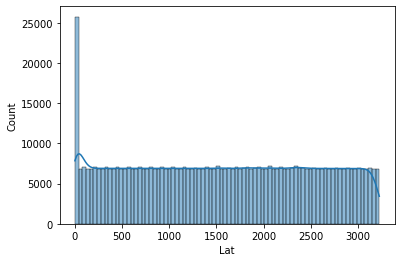

In [26]:
import seaborn as sns
sns.histplot(x='Lat', data=data_frame, kde=True)
 
plt.show()

# **LINE PLOT BETWEEN Province State AND Confirmed deaths**

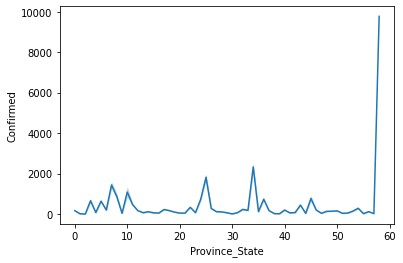

In [27]:
sns.lineplot(x='Province_State', y='Confirmed', data=data_frame)
plt.show()

# **BARPLOT BETWEEN UID AND Confirmed**

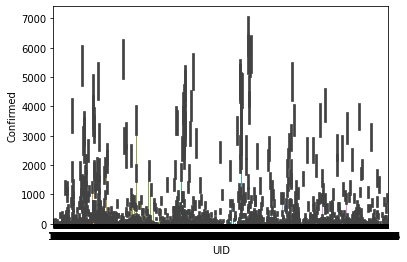

In [31]:
sns.barplot(x='UID',y='Confirmed', data=data_frame)
plt.show()

# **PLOTS FOR INDIVIDUAL FEATURES**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

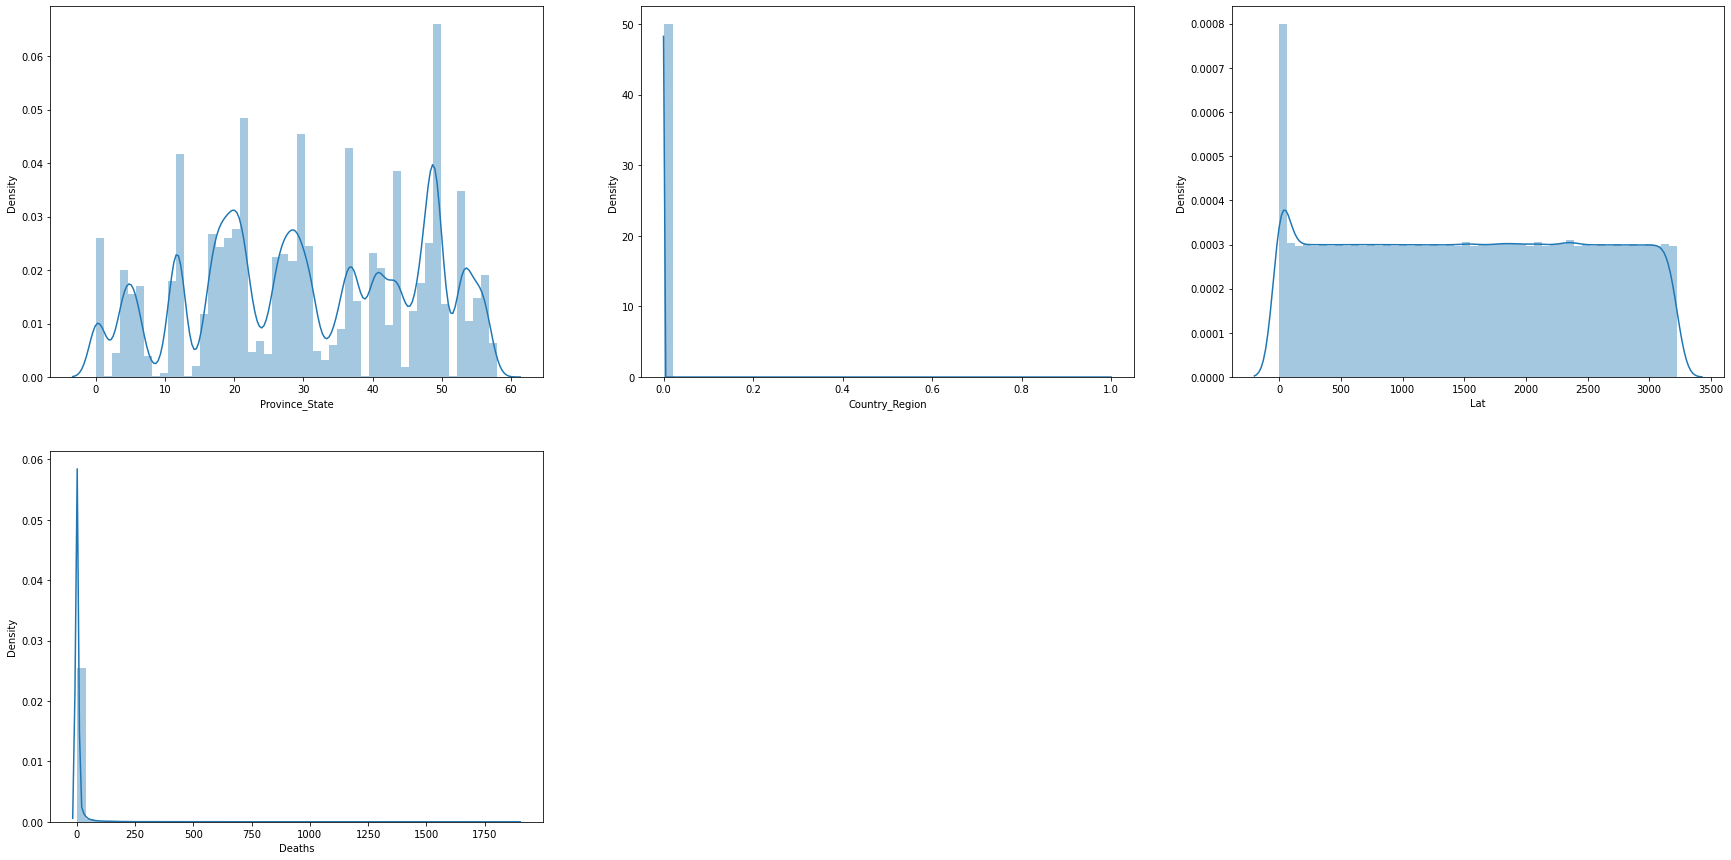

In [32]:
features = ['Province_State', 'Country_Region', 'Lat', 'Deaths']
plt.subplots(figsize=(30,15))
import seaborn as sb 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data_frame[col])
plt.show()

# **CORRELATION HEAT MAP**

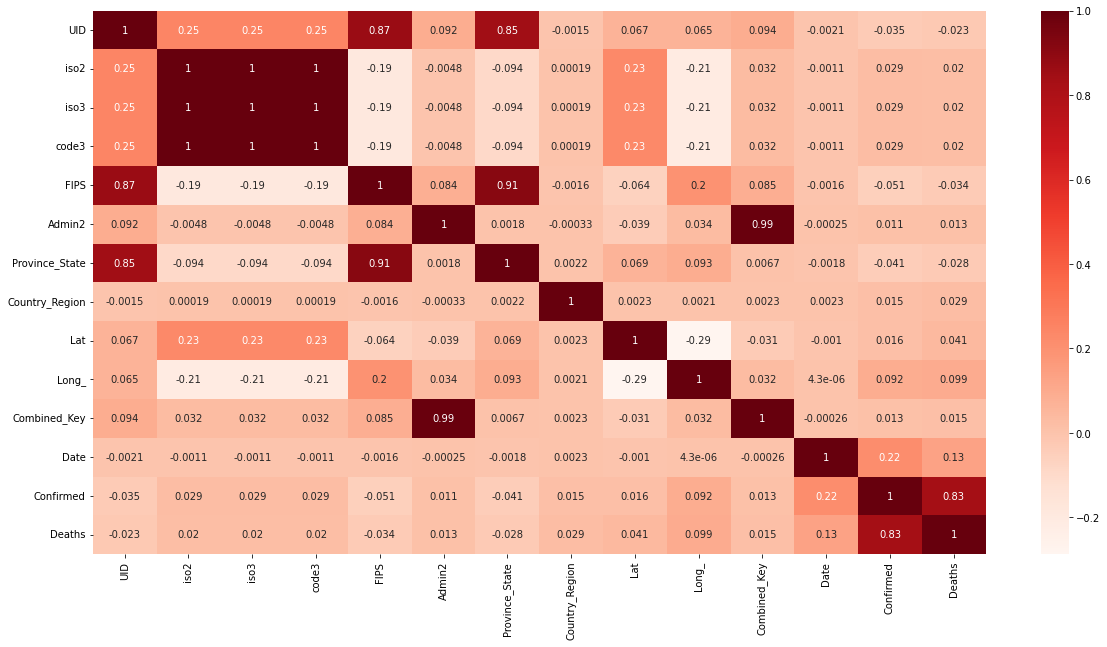

In [33]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **NETWORK GRAPH BETWEEN UID AND Confirmed**

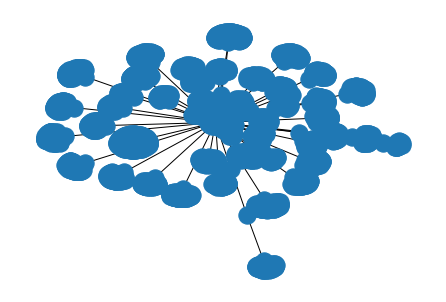

In [44]:
import networkx as nx 
G = nx.from_pandas_edgelist(data_frame, source='UID', target='Province_State',edge_attr=True)
nx.draw(G) 


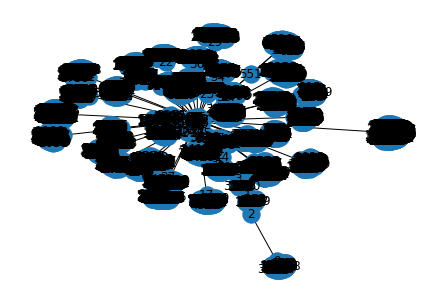

In [45]:
nx.draw(G, with_labels=True)

# **NODES**

In [46]:
G.nodes

NodeView((0, 2, 1, 14, 39, 4, 44, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 3, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

# **HISTOGRAM FOR DEGREES OF NODES**

(array([3.301e+03, 8.000e+00, 1.200e+01, 1.200e+01, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  26.6,  52.2,  77.8, 103.4, 129. , 154.6, 180.2, 205.8,
        231.4, 257. ]),
 <BarContainer object of 10 artists>)

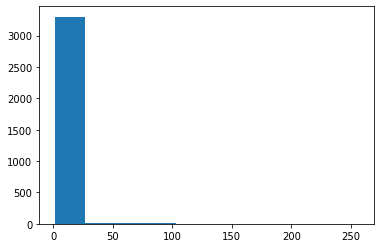

In [47]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

# **DEGREE CENTARLITY MEASURES**

In [48]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{0: 0.020964360587002098,
 2: 0.0005989817310572028,
 1: 0.009583707696915245,
 14: 0.0005989817310572028,
 39: 0.0005989817310572028,
 4: 0.02336028751123091,
 44: 0.02425876010781671,
 5: 0.018268942797244683,
 6: 0.020065887990416295,
 7: 0.0032943995208146153,
 8: 0.0017969451931716084,
 9: 0.0005989817310572028,
 10: 0.0011979634621144056,
 11: 0.020964360587002098,
 12: 0.04851752021563342,
 13: 0.0005989817310572028,
 15: 0.002395926924228811,
 16: 0.014076070679844266,
 17: 0.031446540880503145,
 18: 0.028451632225217134,
 19: 0.030548068283917342,
 20: 0.03234501347708895,
 21: 0.03683737646001797,
 22: 0.020065887990416295,
 23: 0.0056903264450434265,
 24: 0.008086253369272238,
 25: 0.005390835579514825,
 26: 0.026355196166516923,
 27: 0.026954177897574125,
 28: 0.025456723569931117,
 29: 0.03563941299790357,
 30: 0.017669961066187484,
 31: 0.028751123090745734,
 32: 0.005989817310572028,
 33: 0.003893381251871818,
 34: 0.0071877807726864335,
 35: 0.01078167115902965,
 36: 0.

# **CLOSENESS CENTARLITY MEASURES**

In [49]:
closeness_centrality = nx.closeness_centrality(G)
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

44 0.4920424403183024
49 0.34737827715355807
12 0.3406447663742093
53 0.3388471686624721
21 0.33795546558704453
29 0.33768203883495146
20 0.3369323915237134
17 0.33672851956434047
37 0.3365927419354839
19 0.3365248941745616
48 0.33625377643504534
31 0.33611838131669014
18 0.33605072463768115
40 0.33578037007240547
27 0.3357128493866881
26 0.33557788944723616
28 0.3353756528726396
41 0.3350391330523781
4 0.3349047141424273
56 0.33470328789093823
39 0.3345021037868163
11 0.3343681153615061
43 0.3343681153615061
47 0.3343011613936724
6 0.3341673338670937
22 0.3341673338670937
36 0.33403361344537813
5 0.3337664934026389
30 0.33363309352517984
55 0.33356643356643356
38 0.3334331935290593
46 0.3329676904666933
16 0.3328349282296651
54 0.3325034853614818
42 0.3323049363057325
50 0.33223880597014926
35 0.33210662422916254
14 0.3319085487077535
24 0.33151310563939634
57 0.33144729005360335
34 0.33131573724945423
32 0.3310529446757882
23 0.33098731165741474
52 0.33098731165741474
25 0.3309217046

# **BETWEENNESS CENTARLITY MEASURES**

In [50]:
betweenness_centrality = nx.betweenness_centrality(G)
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

44 0.97124394221854
49 0.14748229388110912
12 0.09383960388968472
53 0.07923946905599008
21 0.07175130020128155
29 0.06944114717383085
20 0.06307342227619876
17 0.061333001722117336
37 0.06017182413623622
19 0.05959096617834762
48 0.05726573991380621
31 0.0561020501217433
18 0.05551993606076381
40 0.05318968538385883
27 0.05260667410638583
26 0.051440113221543744
28 0.04968892606954038
41 0.04676669195022745
4 0.04559654219941139
56 0.04383997174844705
39 0.041635869710527455
2 0.04106201004128811
0 0.04090876546419918
11 0.04090876546419918
43 0.04090876546419918
47 0.0403219858774535
6 0.03914788837406606
22 0.03914788837406606
36 0.03797307309748383
5 0.03562128922473497
30 0.034444320628568344
55 0.03385556716553698
38 0.032677521909578164
46 0.02854871104981328
16 0.02736743581447788
54 0.024411107468412147
42 0.02263515714118832
50 0.02204281481218298
35 0.0208575918242762
14 0.018989407641521096
1 0.01848499252887826
24 0.015515205935410102
57 0.014920710286820375
34 0.013731180

# **PAGE RANK MEASURES**

In [51]:
nx.pagerank(G)

{0: 0.0097299026291577,
 2: 0.000274650149427194,
 1: 0.004473764531663574,
 14: 0.00026597564896854026,
 39: 0.0002645103770253062,
 4: 0.010781120733679234,
 44: 0.00960747298319592,
 5: 0.008438180326970243,
 6: 0.009265114184332143,
 7: 0.001543373492708947,
 8: 0.0008507240286774551,
 9: 0.000290570545062242,
 10: 0.0005720314537462304,
 11: 0.009678574873394595,
 12: 0.02228188449514861,
 13: 0.000290570545062242,
 15: 0.0011282152691182042,
 16: 0.00650857249679553,
 17: 0.014502102783996072,
 18: 0.013123975963494426,
 19: 0.014088666129684355,
 20: 0.014915538387286004,
 21: 0.016982703303569,
 22: 0.009265114184332143,
 23: 0.0026480149378050356,
 24: 0.0037514314933983868,
 25: 0.0025100321484603613,
 26: 0.012159278064729807,
 27: 0.0124349069286117,
 28: 0.011745833274434044,
 29: 0.016431461212119462,
 30: 0.0081625313360273,
 31: 0.01326178927885428,
 32: 0.0027859813566774873,
 33: 0.0018197567496591367,
 34: 0.0033377214792996625,
 35: 0.0049922804953122825,
 36: 0.008